In [38]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import glob
import cv2

In [2]:
train_files=glob.glob("C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/archive (2)/*/**")

In [3]:
len(train_files)

4136

In [4]:
train_files[0]

'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/archive (2)\\without_mask\\2022_2$largeimg_1023145566.jpeg'

In [5]:
from random import shuffle
shuffle(train_files)
train_files

['C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/archive (2)\\without_mask\\Faceimg235.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/archive (2)\\with_mask\\image1,550.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/archive (2)\\without_mask\\images (72).jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/archive (2)\\without_mask\\images (82).jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/archive (2)\\with_mask\\image1,763.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/archive (2)\\without_mask\\Faceimg694.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/archive (2)\\with_mask\\image1,844.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/archive (2)\\with_mask\\image1,374.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/archive (2)\\without_mask\\Faceimg286.jpg',
 'C:/Users/DIBYAJYOTI HALOI/OneDrive/Desktop/summer project/archive (2)\\w

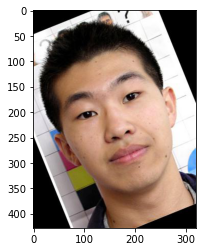

In [6]:
from PIL import Image
img=Image.open(train_files[1000])
plt.imshow(img)

In [7]:
np.array(img).shape

(428, 320, 3)

In [8]:
img=img.resize((128,128))

In [10]:
np.array(img).shape

(128, 128, 3)

In [29]:
grey_files=[]

In [30]:
for item in train_files:
    img=Image.open(item).convert('L')
    img.save('greyscale.jpeg')
    grey_files.append(img)

C:\Users\DIBYAJYOTI HALOI\OneDrive\Documents\tempo\lib\site-packages\PIL\Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [31]:
np.array(grey_files[0]).shape

(141, 143)

In [32]:
modified_files=[]

In [33]:
for item in grey_files:
    img=item.resize((128,128))
    modified_files.append(img)

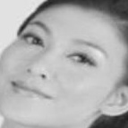

In [34]:
modified_files[0]

In [35]:
np.array(modified_files[0]).shape

(128, 128)

In [36]:
coloured_files=[]

In [40]:
for i,fi in enumerate(modified_files):
    im_array=np.array(fi)
    img= cv2.cvtColor(im_array,cv2.COLOR_GRAY2RGB)
    coloured_files.append(img)

In [41]:
len(coloured_files)

4136

In [44]:
coloured_files[0]

array([[[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [ 57,  57,  57],
        [ 56,  56,  56],
        [ 55,  55,  55]],

       [[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [ 59,  59,  59],
        [ 58,  58,  58],
        [ 58,  58,  58]],

       [[225, 225, 225],
        [225, 225, 225],
        [225, 225, 225],
        ...,
        [ 62,  62,  62],
        [ 62,  62,  62],
        [ 61,  61,  61]],

       ...,

       [[214, 214, 214],
        [194, 194, 194],
        [180, 180, 180],
        ...,
        [ 51,  51,  51],
        [ 55,  55,  55],
        [ 59,  59,  59]],

       [[206, 206, 206],
        [188, 188, 188],
        [174, 174, 174],
        ...,
        [ 55,  55,  55],
        [ 56,  56,  56],
        [ 57,  57,  57]],

       [[199, 199, 199],
        [183, 183, 183],
        [172, 172, 172],
        ...,
        [ 56,  56,  56],
        [ 56,  56,  56],
        [ 56,  56,  56]]

In [43]:
np.array(coloured_files[0]).shape

(128, 128, 3)

In [46]:
X_train=np.zeros((len(coloured_files),128,128,3))
for i,fi in enumerate(coloured_files):
    #fi_array=np.array(fi)
    if(fi.shape[0]==128 and fi.shape[1]==128):
        X_train[i,:,:,:]=fi

In [47]:
X_train

array([[[[225., 225., 225.],
         [225., 225., 225.],
         [225., 225., 225.],
         ...,
         [ 57.,  57.,  57.],
         [ 56.,  56.,  56.],
         [ 55.,  55.,  55.]],

        [[225., 225., 225.],
         [225., 225., 225.],
         [225., 225., 225.],
         ...,
         [ 59.,  59.,  59.],
         [ 58.,  58.,  58.],
         [ 58.,  58.,  58.]],

        [[225., 225., 225.],
         [225., 225., 225.],
         [225., 225., 225.],
         ...,
         [ 62.,  62.,  62.],
         [ 62.,  62.,  62.],
         [ 61.,  61.,  61.]],

        ...,

        [[214., 214., 214.],
         [194., 194., 194.],
         [180., 180., 180.],
         ...,
         [ 51.,  51.,  51.],
         [ 55.,  55.,  55.],
         [ 59.,  59.,  59.]],

        [[206., 206., 206.],
         [188., 188., 188.],
         [174., 174., 174.],
         ...,
         [ 55.,  55.,  55.],
         [ 56.,  56.,  56.],
         [ 57.,  57.,  57.]],

        [[199., 199., 199.],
       

In [48]:
X_train/255.0

array([[[[0.88235294, 0.88235294, 0.88235294],
         [0.88235294, 0.88235294, 0.88235294],
         [0.88235294, 0.88235294, 0.88235294],
         ...,
         [0.22352941, 0.22352941, 0.22352941],
         [0.21960784, 0.21960784, 0.21960784],
         [0.21568627, 0.21568627, 0.21568627]],

        [[0.88235294, 0.88235294, 0.88235294],
         [0.88235294, 0.88235294, 0.88235294],
         [0.88235294, 0.88235294, 0.88235294],
         ...,
         [0.23137255, 0.23137255, 0.23137255],
         [0.22745098, 0.22745098, 0.22745098],
         [0.22745098, 0.22745098, 0.22745098]],

        [[0.88235294, 0.88235294, 0.88235294],
         [0.88235294, 0.88235294, 0.88235294],
         [0.88235294, 0.88235294, 0.88235294],
         ...,
         [0.24313725, 0.24313725, 0.24313725],
         [0.24313725, 0.24313725, 0.24313725],
         [0.23921569, 0.23921569, 0.23921569]],

        ...,

        [[0.83921569, 0.83921569, 0.83921569],
         [0.76078431, 0.76078431, 0.76078431]

In [49]:
Y_train=np.zeros((len(train_files)))
for i,fi in enumerate(train_files):
    p=fi.find("with_mask")
    q=fi.find("without_mask")
    if p!=-1:
        Y_train[i]=0.0
    elif q!=-1:
        Y_train[i]=1.0

In [50]:
Y_train

array([1., 0., 1., ..., 1., 1., 1.])

In [51]:
len(Y_train)

4136

In [52]:
from keras.models import Sequential

In [53]:
model=Sequential()
model_part1=tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(128,128,3),
    pooling='avg',
    classes=1000,
    classifier_activation="softmax",
)

58889256/58889256 [==============================] - 2s 0us/step


In [54]:
for layer in model_part1.layers:
    layer.trainable=False

In [55]:
from keras.layers import Flatten,Dense

In [56]:
model.add(model_part1)

In [57]:
model.add(Flatten())

In [58]:
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [59]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate= 1e-3),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 14,978,370
Trainable params: 263,682
Non-trainable params: 14,714,688
_________________________________________________________________


In [61]:
X_train.shape

(4136, 128, 128, 3)

In [63]:
Y_train.shape

(4136,)

In [64]:
model.fit(X_train, Y_train,epochs=5,validation_split=0.1)

Epoch 1/5
117/117 [==============================] - 193s 2s/step - loss: 0.4891 - accuracy: 0.9352 - val_loss: 0.4961 - val_accuracy: 0.9372
Epoch 2/5
117/117 [==============================] - 178s 2s/step - loss: 0.1624 - accuracy: 0.9672 - val_loss: 0.1957 - val_accuracy: 0.9614
Epoch 3/5
117/117 [==============================] - 180s 2s/step - loss: 0.0483 - accuracy: 0.9852 - val_loss: 0.1892 - val_accuracy: 0.9517
Epoch 4/5
117/117 [==============================] - 181s 2s/step - loss: 0.0218 - accuracy: 0.9941 - val_loss: 0.1922 - val_accuracy: 0.9710
Epoch 5/5
117/117 [==============================] - 184s 2s/step - loss: 0.0148 - accuracy: 0.9970 - val_loss: 0.2246 - val_accuracy: 0.9638
